### Plotting alignment data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
import utils.db_utils as db
import utils.plot_utils as plot
import utils.file_utils as file

targetLang = 'en'
bibleType = 'en_ult'
dbPath = f'./data/{bibleType}_alignments.sqlite'

connection = db.initAlignmentDB(dbPath)

Connection to SQLite DB successful


In [45]:
def getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = False):
    frequenciesOfAlignments = {}
    # for each word add line to plot
    for origWord in alignmentsForWord.keys():
        wordAlignments_ = pd.DataFrame(alignmentsForWord[origWord])
        frequency_ = wordAlignments_[field].value_counts()
        if sortIndex:
            frequency_ = frequency_.sort_index()
        frequenciesOfAlignments[origWord] = frequency_

    return frequenciesOfAlignments

def getDataFrameForOriginalWords(connection, words, searchLemma = True, minAlignments = 100):
    alignments_ = db.getAlignmentsForOriginalWords(connection, words, searchLemma)
    alignmentsList, rejectedAlignmentsList = db.filterAlignments(alignments_, minAlignments)
    alignments = pd.DataFrame(alignmentsList)
    return alignments

def getFilteredAlignmentsForWord(alignmentsForWord, remove = []):
    filteredAlignmentsForWord = {}
    for origWord in alignmentsForWord.keys():
        print(f"{origWord}")
        if not origWord in remove:
            alignments = alignmentsForWord[origWord]
            alignmentsCount = len(alignments)
            if alignmentsCount >= minAlignments:
                filteredAlignmentsForWord[origWord] = alignments

    return filteredAlignmentsForWord

def getFilteredLemmas(termsPath, minAlignments, remove = []):
    data = file.initJsonFile(termsPath)
    lemmasList = list(data.keys())
    print (f"'{termsPath}' has count: {len(lemmasList)}")
    filteredLemmas = {}
    for lemma in lemmasList:
        item = data[lemma]
        if item['count'] >= minAlignments:
            filteredLemmas[lemma] = item

    for item in remove:
        if item in filteredLemmas:
            del filteredLemmas[item]
    print (f"filtered count: {len(filteredLemmas)}")

    return lemmasList

def plotFrequencies(frequenciesOfAlignments, title='', ylabel='', showXValues=False, xlimit=None):
    plt.figure()
    for origWord in frequenciesOfAlignments.keys():
        frequency_ = frequenciesOfAlignments[origWord]
        frequencyValues_ = list(frequency_.values)
        total = 0
        for value in frequencyValues_:
            total += value
        # print(f"for {origWord} total is {total}")
        if showXValues:
            x = list(frequency_.index)
        else:
            x = range(len(frequencyValues_))
        y = frequencyValues_ / total * 100 # scale to percent
        plt.plot(x,y)
        break

    if xlimit:
        plt.xlim(xlimit)
    plt.ylabel(ylabel)
    plt.suptitle(title, fontsize=16)

    plt.show()

def plotXYdataDict(dataDict, title='', ylabel='', xlabel='', showXValues=False, xlimit=None):
    plt.figure()
    for origWord in dataDict.keys():
        data = deepcopy(dataDict[origWord])
        total = 0
        for value in data: # get total
            y = value[1]
            total += y
        # print(f"total = {total}")
        for value in data: # get percent
            y = value[1]
            value[1] = y / total * 100 # scale to percent
        plt.plot(data)
        if len(data) > 6:
            print(f"for {origWord} original data: {dataDict[origWord]}")
            print(f"normalized data: {data}")
        break

    if xlimit:
        plt.xlim(xlimit)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.suptitle(title, fontsize=16)

    plt.show()

def zeroFillFrequencies(field_frequencies):
    filledFrequencies = {}
    for originalWord in field_frequencies.keys():
        field_frequency = field_frequencies[originalWord]
        data = []
        lastX = 0
        for key in field_frequency.keys():
            x = key
            y = field_frequency[key]
            while x > lastX: # do zero fill
                data.append([lastX, 0])
                lastX += 1
            data.append([x, y])
            lastX += 1
        data.append([lastX, 0])
        filledFrequencies[originalWord] = data
    return filledFrequencies

In [3]:
minAlignments = 100
termsPath = './data/kt_en_NT_lemmas.json'
remove = ['ὁ']
lemmasList = getFilteredLemmas(termsPath, minAlignments, remove)

'./data/kt_en_NT_lemmas.json' has count: 701
filtered count: 49


In [4]:
# find all alignments for this lemma

alignmentsForWord = db.getAlignmentsForOriginalWords(connection, lemmasList, searchLemma = True)

updating 'βδέλυγμα'
updating 'βδελύσσομαι'
updating 'μοιχεύω'
updating 'μοιχάω'
updating 'μοιχαλίς'
updating 'μοιχεία'
updating 'μοιχός'
updating 'θυσιαστήριον'
updating 'βωμός'
updating 'ἀμήν'
updating 'ἄγγελος'
Replacing "angel s" with "angel's"
Replacing "the angel s measure" with "the angel's measure"
updating 'ἰσάγγελος'
updating 'ἀρχάγγελος'
updating 'ἀλείφω'
updating 'μυρίζω'
updating 'χρίω'
updating 'ἐπιχρίω'
updating 'χρῖσμα'
updating 'ἐγχρίω'
updating 'ἀπόστολος'
updating 'ἀποστολή'
updating 'τάσσω'
updating 'καθίστημι'
updating 'τίθημι'
updating 'ποιέω'
updating 'κεῖμαι'
updating 'ἀναδείκνυμι'
updating 'διατίθημι'
updating 'προχειρίζω'
updating 'προστάσσω'
updating 'ὁρίζω'
updating 'προθεσμία'
updating 'κιβωτός'
updating 'ἐξουσία'
updating 'κατεξουσιάζω'
updating 'ἐξουσιάζω'
updating 'δυνάστης'
updating 'ὑπεροχή'
updating 'αὐθεντέω'
updating 'ἐπιταγή'
updating 'κυριότης'
updating 'βαπτίζω'
updating 'βάπτισμα'
updating 'βαπτιστής'
updating 'βαπτισμός'
updating 'πιστεύω'
updat

In [5]:
remove = ['ὁ']
filteredAlignmentsForWord = getFilteredAlignmentsForWord(alignmentsForWord, remove)

βδέλυγμα
βδελύσσομαι
μοιχεύω
μοιχάω
μοιχαλίς
μοιχεία
μοιχός
θυσιαστήριον
βωμός
ἀμήν
ἄγγελος
ἰσάγγελος
ἀρχάγγελος
ἀλείφω
μυρίζω
χρίω
ἐπιχρίω
χρῖσμα
ἐγχρίω
ἀπόστολος
ἀποστολή
τάσσω
καθίστημι
τίθημι
ποιέω
κεῖμαι
ἀναδείκνυμι
διατίθημι
προχειρίζω
προστάσσω
ὁρίζω
προθεσμία
κιβωτός
ἐξουσία
κατεξουσιάζω
ἐξουσιάζω
δυνάστης
ὑπεροχή
αὐθεντέω
ἐπιταγή
κυριότης
βαπτίζω
βάπτισμα
βαπτιστής
βαπτισμός
πιστεύω
ἀπιστία
ἄπιστος
πιστός
πίστις
ἀγαπητός
ἀγαπάω
βλασφημέω
βλασφημία
βλάσφημος
μακάριος
εὐλογέω
κατευλογέω
εὐλογητός
μακαρίζω
ἐνευλογέω
μακαρισμός
εὐλογία
μακαριώτερος
αἷμα
σῶμα
πτῶμα
σωματικός
πειθαρχέω
κατέχω
σύνσωμος
κῶλον
παραδίδωμι
δέω
δεσμεύω
ὀφείλω
δεσμός
καταδέω
περιδέω
σύνδεσμος
ἀναθεματίζω
περίκειμαι
δουλεία
συνκλείω
δουλόω
δέσμιος
συνδέω
φείδομαι
παλιγγενεσία
γεννάω
παλινγενεσία
ἀναγεννάω
ἀδελφός
ἀδελφότης
λέγω
καλέω
προσκαλέω
ἐπικαλέω
προσφωνέω
φωνέω
κλητός
συνκαλέω
ἐπιλέγω
μεταπέμπω
μετακαλέω
χρηματίζω
ὀνομάζω
παρακαλέω
κλῆσις
ψευδώνυμος
ἑκατόνταρχος
ἑκατοντάρχης
κεντυρίων
παιδίον
παῖς
τέ

In [6]:
# find all alignments for this original word

# word = 'Θεός' # found 69
# word = 'Θεὸς' # found 239
# word = 'Θεοῦ'  # found 712
# origAlignments = getDataFrameForOriginalWords(connection, word, searchLemma = False)
# origAlignments

In [7]:
# db.describeAlignments(origAlignments)

### Analysis of alignments for keyterms in the en_ult:

#### Frequency of alignments:

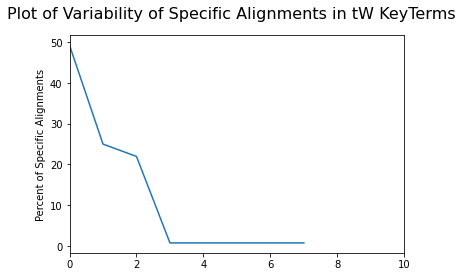

In [39]:
frequenciesOfAlignments = getFrequenciesOfFieldInAlignments(filteredAlignmentsForWord, 'alignmentTxt')

title = f"Plot of Variability of Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlimit = [0, 10]
plotFrequencies(frequenciesOfAlignments, title, ylabel, showXValues=False, xlimit=xlimit)

### Analysis:

#### Analysis of numerical metrics:

#### Analysis of original language word count:

[[0, 0.0], [1, 100.0], [2, 0.0]]


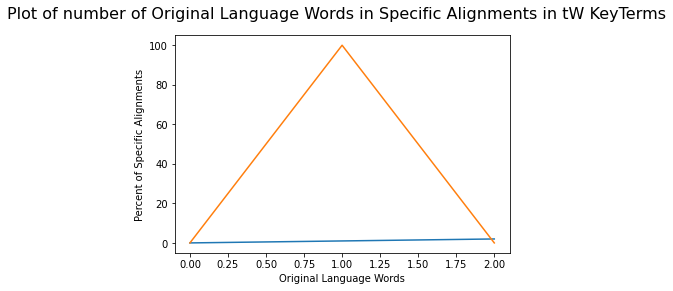

In [44]:
field = 'alignmentOrigWords'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)


#### Analysis of target language word count:

for βλασφημία original data: [[0, 0], [1, 16], [2, 1], [3, 0], [4, 0], [5, 1], [6, 0]]
normalized data: [[0, 0.0], [1, 88.88888888888889], [2, 5.555555555555555], [3, 0.0], [4, 0.0], [5, 5.555555555555555], [6, 0.0]]
for λέγω original data: [[0, 0], [1, 2330], [2, 105], [3, 4], [4, 2], [5, 1], [6, 0]]
normalized data: [[0, 0.0], [1, 95.4135954135954], [2, 4.2997542997543], [3, 0.16380016380016382], [4, 0.08190008190008191], [5, 0.040950040950040956], [6, 0.0]]
for ἐπικαλέω original data: [[0, 0], [1, 26], [2, 5], [3, 1], [4, 0], [5, 0], [6, 0], [7, 0], [8, 1], [9, 0]]
normalized data: [[0, 0.0], [1, 78.78787878787878], [2, 15.151515151515152], [3, 3.0303030303030303], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 3.0303030303030303], [9, 0.0]]
for πνεῦμα original data: [[0, 0], [1, 420], [2, 41], [3, 1], [4, 0], [5, 1], [6, 0]]
normalized data: [[0, 0.0], [1, 90.71274298056156], [2, 8.855291576673865], [3, 0.21598272138228944], [4, 0.0], [5, 0.21598272138228944], [6, 0.0]]
for αἰών origi

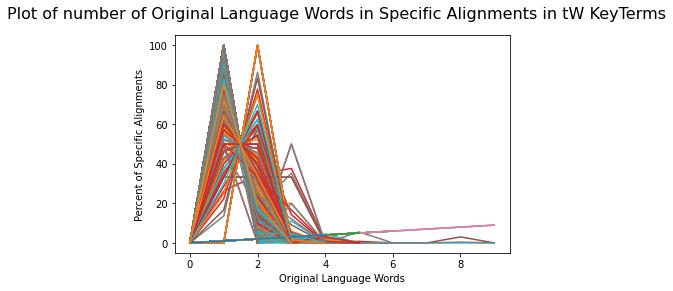

In [31]:
field = 'alignmentTargetWords'
field = 'alignmentOrigWords'
field_frequencies = getFrequenciesOfFieldInAlignments(alignmentsForWord, field, sortIndex = True)
filledFrequencies = zeroFillFrequencies(field_frequencies)

title = f"Plot of number of Original Language Words in Specific Alignments in tW KeyTerms"
ylabel = "Percent of Specific Alignments"
xlabel = "Original Language Words"
plotXYdataDict(filledFrequencies, title, ylabel, xlabel, showXValues=True)

##### Notes:
- this field analysis suggests that for θεός likely all the target language word counts are tight. The word count of 3 probably good for English (`of a god`). But still we could probaby use that as a threshold for to flag for review.
<p></p>

#### Analysis of count of extra unaligned words between aligned original language words:

In [13]:
field = 'origWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")


Frequency of origWordsBetween:
0    711
2      1
Name: origWordsBetween, dtype: int64


##### Notes:
- this field analysis suggests that most original language alignments probably good. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>

#### Analysis of count of extra unaligned words between aligned target language words:


Frequency of targetWordsBetween:
0    712
Name: targetWordsBetween, dtype: int64


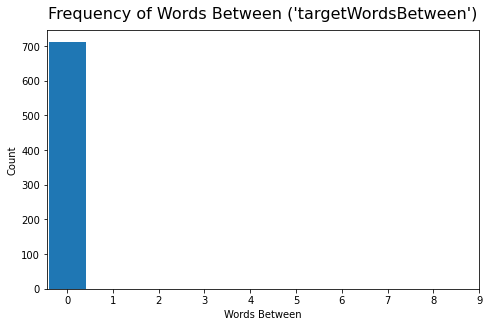

In [14]:
field = 'targetWordsBetween'
field_frequency = origAlignments[field].value_counts().sort_index()
print(f"\nFrequency of {field}:\n{field_frequency}")
plot.plotFieldFrequency(field_frequency, field, f"Words Between", max=10)

##### Notes:
- this field analysis suggests that most target language alignments probably good. Large gaps between aligned words are likely due to wordmap suggesting wrong occurence of a word and the user selecting. Probably the cases of a word between (count > 0) aligned words should be reviewed.
<p></p>